In [1]:
import nibabel as nib
import numpy as np
import os
import matplotlib.pyplot as plt
from mask_reorient import *

In [2]:
data_path = 'C:/Users/shwet/Box/UPenn/Lab/mask_issues/1569365'


# open image and mask
image_path = os.path.join(data_path, 'T1_VIBE_SPAIR_POSTSAG_SUB_6.nii.gz')
mask_gandlf_path =  os.path.join(data_path, '1569365_seg.nii.gz')
image = nib.load(image_path)
image_header = image.header
mask_gandlf = nib.load(mask_gandlf_path)
mask_gandlf_header = mask_gandlf.header

# image and mask array
image_arr = image.get_fdata()
mask_gandlf_arr = mask_gandlf.get_fdata() 

In [3]:
print(image_arr.shape)
print(nib.aff2axcodes(mask_gandlf.affine))
print(nib.aff2axcodes(image.affine))

(88, 512, 512)
('R', 'A', 'S')
('R', 'A', 'S')


In [4]:
def my_view(img, header=None, xhair=None, crange=None, cmap='gray'):
    """Display a 3D image in a layout similar to ITK-SNAP
    :param img: 3D voxel array
    :param header: Image header (returned by my_read_nifti)
    :param xhair: Crosshair position (1D array or tuple)
    :param crange: Intensity range, a tuple with minimum and maximum values
    :param cmap: Colormap (a string, see matplotlib documentation)
    """
    # voxel spacing (mm) 
    if header is not None:
        pixel_dim = header['pixdim']
        x_space = pixel_dim[1]
        y_space = pixel_dim[2]
        z_space = pixel_dim[3]
        
    if crange is None:
        crange = [None, None]

    dim_img = np.shape(img)
    ## start plotting

    # initiate a subplot 2x2 
    fig, axs = plt.subplots(2,2)

    # for each slice, create a subplot 

    for slice_n in range(3):
        
        if slice_n == 0: # for xy slice
            a,b = 0,0
            slice_now = img[:,:,xhair[2]].T
            aspect_rat = y_space/x_space 
            vline = xhair[0] # coordinate for vertical line
            hline = xhair[1] # coordinate for horizontal line

        elif slice_n == 1: # for yz slice
            a,b = 0,1
            slice_now = img[xhair[0],:,:].T #yz slice
            aspect_rat = z_space/y_space #aspect ratio
            vline = xhair[1] # coordinate for vertical line
            hline = xhair[2] # coordinate for horizontal line
      
        elif slice_n == 2: # for xz slice
            a,b = 1,1
            slice_now = img[:,xhair[1],:].T  #xz slice
            aspect_rat = z_space/x_space #aspect ratio
            vline = xhair[0] # coordinate for vertical line
            hline = xhair[2] # coordinate for horizontal line
    
        # plot the slice
        im1 = axs[a,b].imshow(slice_now,cmap=cmap, vmin=crange[0], vmax=crange[1], \
                          aspect=aspect_rat)

        # add horizontal and vertical crosshair lines
        axs[a,b].axvline(x=vline, color='c')
        axs[a,b].axhline(y=hline, color='c')
    
#     # invert axes
#     axs[a,b].invert_yaxis() # invert horizontal axis bar 
#     axs[a,b].invert_xaxis() # invert vertical axis bar

    # plot the colorbar
    axs[1,0].axis('off');
    cax = plt.axes([0.175, 0.15, 0.3, 0.05])
    plt.colorbar(im1, orientation='horizontal', ax=axs[0,0], cax=cax)
    return fig

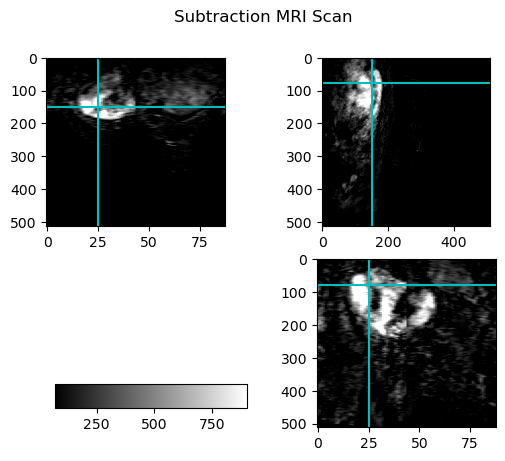

In [5]:
# plot the baseline image
baseline_img = my_view(image_arr, header=image_header, xhair=(25,150,78), crange=(70,900),\
                       cmap='gray')
# add title to the baseline image
baseline_img.suptitle("Subtraction MRI Scan");

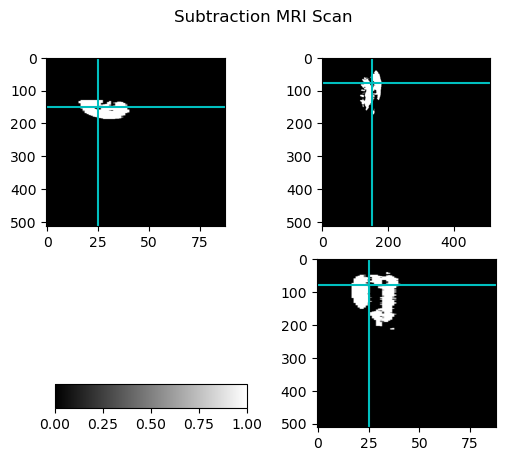

In [6]:
# plot the baseline mask
mask_img = my_view(mask_gandlf_arr, header=mask_gandlf_header, xhair=(25,150,78), crange=(0,1),\
                       cmap='gray')
# add title to the mask
mask_img.suptitle("Subtraction MRI Scan");

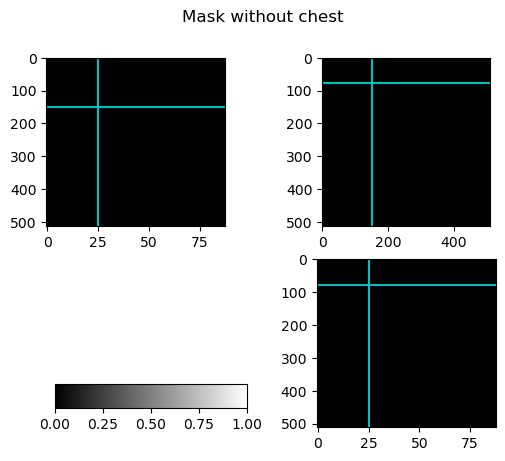

In [7]:
mask_img_new = mask_gandlf_arr
mask_img_new[12:45,:250,:230] *= 0

# plot the baseline mask
mask_img_new_show = my_view(mask_img_new, header=mask_gandlf_header, xhair=(25,150,78), crange=(0,1),\
                       cmap='gray')
# add title to the mask
mask_img_new_show.suptitle("Mask without chest");


In [8]:
mask_img_new_nii = nib.Nifti1Image(mask_img_new, mask_gandlf.affine, itk_orient.header) 
itk_orient_copy.to_filename('Z:/home/majumdes/Datasets/Prospective_PPG/affine_testing/1569365/new_itk_flipped2.nii.gz')


AttributeError: 'Nifti1Header' object has no attribute 'affine'